# Question 1
Reproduce numerically Figure 3.1. Assume `σ = √(0.2)`. Verify that such instability is not present in the Crank-Nicholson or for `θ ≥ 1/2`.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse, linalg
from scipy.sparse.linalg import inv, splu, spsolve

## Reproducing Figure 3.1 with Explicit Finite Difference Method
### Solution for T = 1, δx = 0.1, and δt = 0.001

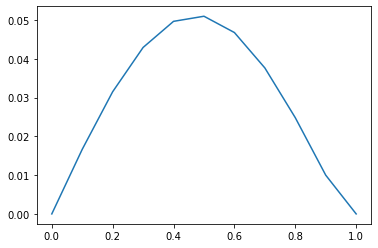

In [2]:
# Define constants
L = 1  # Length of space
T = 1  # Final time
Nx = 10  # Number of spatial grid points
Nt = 1000  # Number of time steps
dx = L / Nx # Space increment
dt = T / Nt # Time increment
sigma = np.sqrt(0.2) 
alpha = dt / dx**2

# Initial condition
def initial_condition(x):
    return x

# Boundary conditions
def boundary_conditions(u):
    u[0] = 0.0
    u[-1] = 0.0

# Define spatial grid
x = np.arange(0, L+dx, dx)

# Define solution array
u = np.minimum(1-x, x)**2

# Iterate through time steps
for n in range(Nt):
    u_new = np.copy(u)
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + (sigma**2/2) * alpha * (u[i - 1] - 2 * u[i] + u[i + 1])
    boundary_conditions(u_new)
    u = u_new

# Graph the solution 
plt.plot(x, u)
plt.show()

### Solution for T = 1, δx = 0.1, and δt = 0.1

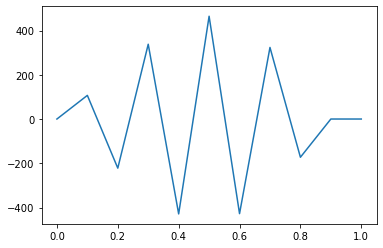

In [3]:
# Define constants
T = 1  # Final time
Nt = 10  # Number of time steps
dt = T / Nt # Time increment
alpha = dt / dx**2

# Define spatial grid
x = np.arange(0, L+dx, dx)

# Define solution array
u = np.minimum(1-x, x)**2

# Iterate through time steps
for n in range(Nt):
    u_new = np.copy(u)
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + (sigma**2/2) * alpha * (u[i - 1] - 2 * u[i] + u[i + 1])
    boundary_conditions(u_new)
    u = u_new

# Graph the solution 
plt.plot(x, u)
plt.show()

### Solution for T = 0, δx = 0.1, and δt = 0.001

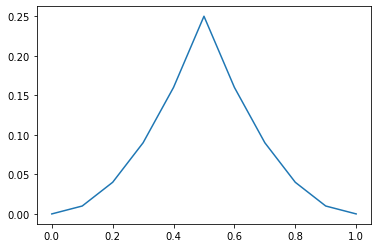

In [4]:
# Define constants
T = 0  # Final time
Nt = 1000  # Number of time steps
dt = T / Nt # Time increment
alpha = dt / dx**2

# Define spatial grid
x = np.arange(0, L+dx, dx)

# Define solution array
u = np.minimum((1-x), x)**2

# Iterate through time steps
for n in range(Nt):
    u_new = np.copy(u)
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + (sigma**2/2) * alpha * (u[i - 1] - 2 * u[i] + u[i + 1])
    boundary_conditions(u_new)
    u = u_new

# Graph the solution 
plt.plot(x, u)
plt.show()

### Solution for T = 0, δx = 0.1, and δt = 0.1

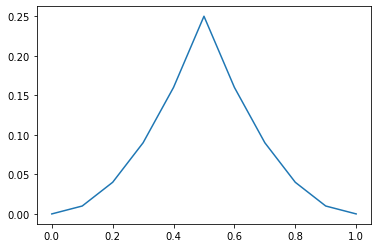

In [5]:
# Define constants
T = 0  # Final time
Nt = 10  # Number of time steps
dt = T / Nt # Time increment
alpha = dt / dx**2

# Define spatial grid
x = np.arange(0, L+dx, dx)

# Define solution array
u = np.minimum(1-x, x)**2

# Iterate through time steps
for n in range(Nt):
    u_new = np.copy(u)
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + (sigma**2/2) * alpha * (u[i - 1] - 2 * u[i] + u[i + 1])
    boundary_conditions(u_new)
    u = u_new

# Graph the solution 
plt.plot(x, u)
plt.show()

## Crank-Nicholson Method
We can show that instability is not present when we use the Crank-Nicholson method. The graph of the solution when we solve with the explicit finite difference method and a time increment of `δt = 0.1` shows a lot of movement. Evidently, with the explicit method, we might not get a clear solution. However, in the next few cells we plot the solution at `T = 0` and `T = 1` for `δt = 0.1` and `δt = 0.001` to show that the graph remains stable when we use Crank-Nicholson instead.

### Graph of solution with δt = 0.1: no instability

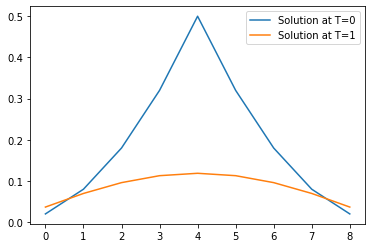

In [6]:
# Define constants
for time in [0, 1]:
    L = 1  # Length of space
    T = time  # Final time
    Nx = 10  # Number of spatial grid points
    Nt = 10  # Number of time steps
    sigma = np.sqrt(0.2)
    
    dx = L / Nx  # Spatial grid spacing
    dt = T / Nt  # Time step size
    alpha = dt / dx**2

    x = np.arange(0, L+dx, dx) # Spatial grid points
    t = np.linspace(0, T, Nt+1)  # Time grid points

    # Initialize solution matrix
    U = np.zeros((Nx+1, Nt+1))

    # Initial condition
    U[:, 0] = np.minimum(1-x, x)**2

    # Boundary conditions
    U[0, :] = 0.0
    U[Nx, :] = 0.0

    # Crank-Nicholson scheme
    r = sigma**2 * alpha/2
    A = np.diag(2 * (1 + r) * np.ones(Nx-1)) + np.diag(-r * np.ones(Nx-2), 1) + np.diag(-r * np.ones(Nx-2), -1)
    B = np.diag(2 * (1 - r) * np.ones(Nx-1)) + np.diag(r * np.ones(Nx-2), 1) + np.diag(r * np.ones(Nx-2), -1)

    for n in range(1, Nt+1):
        b = np.dot(B, U[1:Nx, n-1])
        b[0] += r * U[0, n]
        b[-1] += r * U[Nx, n]
        U[1:Nx, n] = np.linalg.solve(A, b)

    # Graph the solution
    plt.plot(b, label='Solution at T='+str(T))
    plt.legend()

### Graph of solution with δt = 0.001: no instability

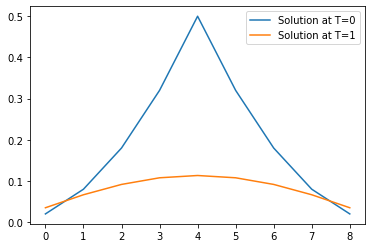

In [7]:
# Define constants
for time in [0, 1]:
    L = 1  # Length of space
    T = time # Final time
    Nx = 10  # Number of spatial grid points
    Nt = 1000  # Number of time steps
    sigma = np.sqrt(0.2)

    dx = L / Nx  # Spatial grid spacing
    dt = T / Nt  # Time step size
    alpha = dt / dx**2

    x = np.arange(0, L+dx, dx)  # Spatial grid points
    t = np.linspace(0, T, Nt+1)  # Time grid points

    # Initialize solution matrix
    U = np.zeros((Nx+1, Nt+1))

    # Initial condition
    U[:, 0] = np.minimum(1-x, x)**2

    # Boundary conditions
    U[0, :] = 0.0
    U[Nx, :] = 0.0

    # Crank-Nicholson scheme
    r = sigma**2 * alpha/2
    A = np.diag(2 * (1 + r) * np.ones(Nx-1)) + np.diag(-r * np.ones(Nx-2), 1) + np.diag(-r * np.ones(Nx-2), -1)
    B = np.diag(2 * (1 - r) * np.ones(Nx-1)) + np.diag(r * np.ones(Nx-2), 1) + np.diag(r * np.ones(Nx-2), -1)

    for n in range(1, Nt+1):
        b = np.dot(B, U[1:Nx, n-1])
        b[0] += r * U[0, n]
        b[-1] += r * U[Nx, n]
        U[1:Nx, n] = np.linalg.solve(A, b)

    # Graph the solution
    plt.plot(b, label='Solution at T='+str(T))
    plt.legend()

# Question 2
Implement a theta PDE scheme in the Black-Scholes setting and price the European options considered in the homework on trees. Allow your scheme to handle early exercise and verify that a Bermudan put has more value than a European put. Verify that the value of the option converges to a well defined limit as the number of exercise dates increases. Compare the results obtained with trees. Replace solving the linear system with a matrix inversion and comment on the computational cost.

## Build a PDE scheme
We build a function that uses a PDE scheme to value an option. Our function is called `option_price_PDE`, and it can handle early exercise in the case of American/Bermudan options.

In [8]:
def option_price_PDE(sigma, r, s0, K, T, early_exercise, M, N, option_type, with_printout):
    
    """
    sigma: volatility
    r: risk-free rate
    s0: underlying price
    K: strike price
    T: final time
    early_exercise: True or False values only (boolean)
    M: number of space steps
    N: number of time steps
    option_type: 'Call' or 'Put'
    with_printout: 'Y' or 'N'
    """
    
    import time
    start_time = time.time()
    
    # define the calculation region
    XMax = np.log(float(K)*3)
    XMin = np.log(float(K)/3)
    
    # define space and time discretization
    x, dx = np.linspace(XMin, XMax, M, retstep=True)
    T, dt = np.linspace(0, T, N, retstep=True)
    
    # calculate payoff based on option type (call or put)
    if option_type == 'Call':
        payoff = np.maximum(np.exp(x)-K, 0)
        
    elif option_type == 'Put':
        payoff = np.maximum(K-np.exp(x), 0)
    
    # initialize a grid
    V = np.zeros((M, N))
    
    # define the boundary vector
    boundary_vector = np.zeros(M-2)
    
    # terminal condition at final time
    V[:, -1] = payoff 
    
    # boundary condition
    V[-1, :] = np.exp(XMax)-np.exp(-r*T[::-1])*K 
    V[0, :] = 0
    
    # build the tri-diagonal matrix
    A = ((dt/2) * ((r-0.5*(sigma**2))/dx - (sigma**2)/(dx**2) ))
    B = (1 + dt * ((sigma**2)/(dx**2) + r ))
    C = (-(dt/2) * ((r-0.5*(sigma**2))/dx + (sigma**2)/(dx**2)))
    D = sparse.diags([A, B, C], [-1, 0, 1], shape=(M-2, M-2)).tocsc()
    
    # overwrite the vectors with calculated values
    for i in range(N-2, -1, -1):
        boundary_vector[0] = A*V[0, i]
        boundary_vector[-1] = C*V[-1, i]
        V[1:-1, i] = spsolve(D, (V[1:-1, i+1]-boundary_vector))
        if early_exercise is True: # allow the function to handle early exercise
            if option_type == 'Call':
                V[1:-1, i] = np.maximum(V[1:-1, i], np.exp(x[1:-1])-K)
            elif option_type == 'Put':
                V[1:-1, i] = np.maximum(V[1:-1, i], K-np.exp(x[1:-1]))

    # return one-dimensional linear interpolant using the discrete values                    
    price = np.interp(np.log(s0), x, V[:, 0])
    
    if with_printout == 'Y':
        print(option_type, "price with strike", str(K)+":", price)

        end_time = time.time()
        elapsed_time = end_time - start_time

        # print the total execution time
        print("Execution time:", elapsed_time, "seconds\n",)
        
    return price

## Price the European option considered in Assignment 1

In [9]:
for ot in ['Call', 'Put']:
        for K in [90, 100, 110]:
            option_price_PDE(0.25, 0, 100, K, 1, False, 3000, 2000, ot, 'Y')

Call price with strike 90: 15.271619639523973
Execution time: 1.3276968002319336 seconds

Call price with strike 100: 9.947030472115511
Execution time: 1.3089778423309326 seconds

Call price with strike 110: 6.189914038220025
Execution time: 1.3206560611724854 seconds

Put price with strike 90: 5.279273486450475
Execution time: 1.2989308834075928 seconds

Put price with strike 100: 9.947023905289601
Execution time: 1.2979230880737305 seconds

Put price with strike 110: 16.182825078338904
Execution time: 1.2862181663513184 seconds



## Verify that an early exercise put has more value than its European counterpart
We run the function for an American and European put option below.

### American put option value at different strikes

In [10]:
for K in [90, 100, 110]:
    option_price_PDE(0.25, 0.05, 100, K, 1, True, 3000, 2000, 'Put', 'Y')

Put price with strike 90: 3.974822287390777
Execution time: 1.3460359573364258 seconds

Put price with strike 100: 7.975961009527742
Execution time: 1.349693775177002 seconds

Put price with strike 110: 13.741701508375558
Execution time: 1.3390028476715088 seconds



### European put option value at different strikes

In [11]:
for K in [90, 100, 110]:
    option_price_PDE(0.25, 0.05, 100, K, 1, False, 3000, 2000, 'Put', 'Y')

Put price with strike 90: 3.7675391210910285
Execution time: 1.2789580821990967 seconds

Put price with strike 100: 7.460835830098332
Execution time: 1.2827179431915283 seconds

Put price with strike 110: 12.658620046474656
Execution time: 1.3082859516143799 seconds



We can conclude that an early exercise put has more value than its European counterpart, and we've verified this for different strike prices `K`.

## Convergence to a well-defined limit
We will show that the option value converges to a well-defined limit using the PDE function as the value of `N` increases. In the next few cells, we create empty lists to store the option values and we plot the results to show that the graph of the option price converges to the values we saw before.

In [12]:
y_points_call_90 = []
y_points_call_100 = []
y_points_call_110 = []
y_points_put_90 = []
y_points_put_100 = []
y_points_put_110 = []

In [13]:
for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 90, 1, False, 3000, N, 'Call', 'N')
    y_points_call_90.append(payoff_value)
    
for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 100, 1, False, 3000, N, 'Call', 'N')
    y_points_call_100.append(payoff_value)

for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 110, 1, False, 3000, N, 'Call', 'N')
    y_points_call_110.append(payoff_value)
    
for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 90, 1, False, 3000, N, 'Put', 'N')
    y_points_put_90.append(payoff_value)

        
for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 100, 1, False, 3000, N, 'Put', 'N')
    y_points_put_100.append(payoff_value)

    
for N in [100, 500, 1000, 1500, 2000]:
    payoff_value = option_price_PDE(0.25, 0, 100, 110, 1, False, 3000, N, 'Put', 'N')
    y_points_put_110.append(payoff_value)

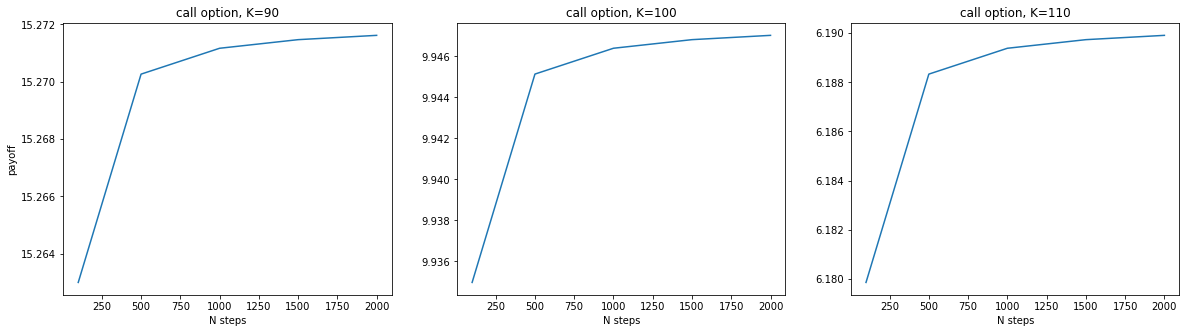

In [14]:
X = [100, 500, 1000, 1500, 2000]
  
Y1 = y_points_call_90 
Y2 = y_points_call_100
Y3 = y_points_call_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1) 
axis[0].set_title("call option, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("call option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

axis[2].plot(X, Y3) 
axis[2].set_title("call option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")

plt.show() 

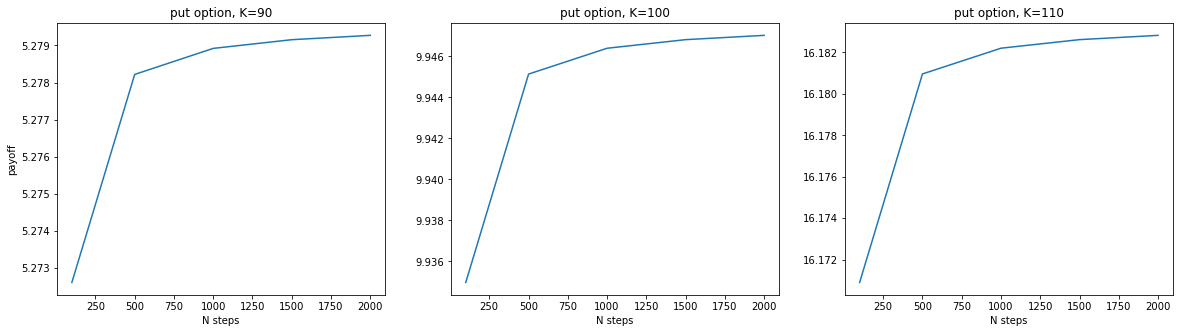

In [15]:
X = [100, 500, 1000, 1500, 2000]
  
Y1 = y_points_put_90 
Y2 = y_points_put_100
Y3 = y_points_put_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1) 
axis[0].set_title("put option, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("put option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

axis[2].plot(X, Y3) 
axis[2].set_title("put option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")

plt.show() 

### Compare convergence with lattice tree results in Assignment 1
The six graphs above show that option value converges to a well-defined limit. We can compare the limit of the graphs with the numerical results from calculating option price with trees. Below is a printout of the results from Assignment 1, which uses lattice methods.

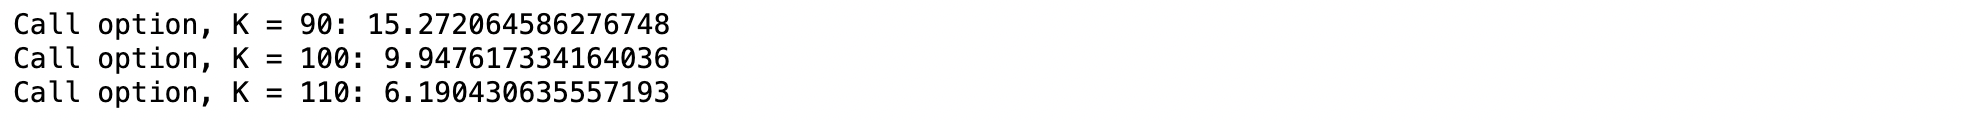

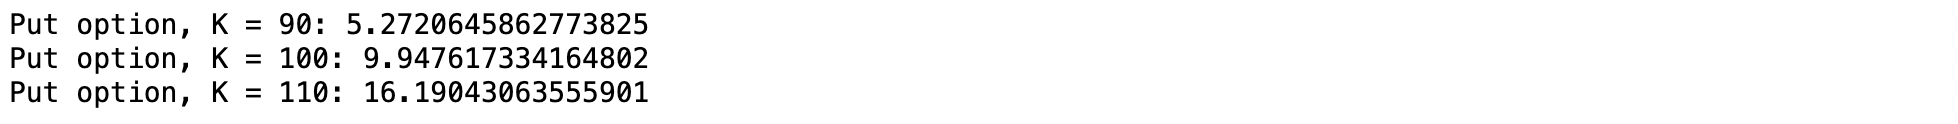

The graphs from the PDE function begin to plateau at values that are similar to the ones obtained by lattice tree methods.

## Calculating option value with matrix inversion
Below, we replace some of the code from our PDE function to solve the linear system with matrix inversion instead. We will see that this method is a lot more computationally expensive.

In [16]:
def option_price_PDE2(sigma, r, s0, K, T, early_exercise, M, N, option_type):
    
    """
    sigma: volatility
    r: risk-free rate
    s0: underlying price
    K: strike price
    T: final time
    early_exercise: True or False values only (boolean)
    M: number of space steps
    N: number of time steps
    option_type: 'Call' or 'Put'
    """
    
    import time
    start_time = time.time()
    
    # define the calculation region
    XMax = np.log(float(K)*3)
    XMin = np.log(float(K)/3)
    
    # define space and time discretization
    x, dx = np.linspace(XMin, XMax, M, retstep=True)
    T, dt = np.linspace(0, T, N, retstep=True)
    
    # calculate payoff based on option type (call or put)
    if option_type == 'Call':
        payoff = np.maximum(np.exp(x)-K, 0)
        
    elif option_type == 'Put':
        payoff = np.maximum(K-np.exp(x), 0)
    
    # initialize a grid
    V = np.zeros((M, N))
    
    # define the boundary vector
    boundary_vector = np.zeros(M-2)
    
    # terminal condition at final time
    V[:, -1] = payoff 
    
    # boundary condition
    V[-1, :] = np.exp(XMax)-np.exp(-r*T[::-1])*K 
    V[0, :] = 0
    
    # build the tri-diagonal matrix
    A = ((dt/2) * ((r-0.5*(sigma**2))/dx - (sigma**2)/(dx**2)))
    B = (1 + dt * ((sigma**2)/(dx**2) + r ))
    C = (-(dt/2) * ((r-0.5*(sigma**2))/dx + (sigma**2)/(dx**2)))
    D = sparse.diags([A, B, C], [-1, 0, 1], shape=(M-2, M-2)).tocsc()
            
    Dinv = inv(D)

    for i in range(N-2, -1, -1):
        boundary_vector[0] = A*V[0, i]
        boundary_vector[-1] = C*V[-1, i]
        V[1:-1, i] = Dinv * (V[1:-1,i+1] - boundary_vector)
        if early_exercise is True: # allow the function to handle early exercise
            if option_type == 'Call':
                V[1:-1, i] = np.maximum(V[1:-1, i], np.exp(x[1:-1])-K)
            elif option_type == 'Put':
                V[1:-1, i] = np.maximum(V[1:-1, i], K-np.exp(x[1:-1]))

    # return one-dimensional linear interpolant using the discrete values                    
    price = np.interp(np.log(s0), x, V[:, 0])
    print(option_type, "price with strike", str(K)+":", price)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # print the total execution time
    print("Execution time:", elapsed_time, "seconds\n")

In [17]:
for ot in ['Call', 'Put']:
    for K in [80, 100, 110]:
        option_price_PDE2(0.25, 0, 100, K, 1, True, 3000, 2000, ot)

Call price with strike 80: 22.26551336963695
Execution time: 10.930387020111084 seconds

Call price with strike 100: 9.947030473953495
Execution time: 10.672776937484741 seconds

Call price with strike 110: 6.189914039166321
Execution time: 10.669344902038574 seconds

Put price with strike 80: 2.3132622694000147
Execution time: 10.755050897598267 seconds

Put price with strike 100: 9.948323637873834
Execution time: 10.643678903579712 seconds

Put price with strike 110: 16.190129423460785
Execution time: 10.687119007110596 seconds



If we try to solve the linear system with a matrix inversion of the tridiagonal matrix `D` by writing `inv(D)`, the computational cost becomes high. The code's execution time with `inv(D)` is over 10 seconds, which is much longer than the previous execution time of around 1 second with `spsolve`.